# Quantum Kernel Methods for Classification using Covalent

Using quantum kernels for spam detection.

#### Referenced Tutorials
1. https://covalent.readthedocs.io/en/latest/tutorials/1_QuantumMachineLearning/classical_quantum_svm/source.html
2. https://covalent.readthedocs.io/en/latest/tutorials/1_QuantumMachineLearning/quantum_embedding_kernel/source.html

In [1]:
# ! pip install qiskit==0.40.0
# ! pip install qiskit-ibm-runtime

     |████████████████████████████████| 190 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 5.3 MB/s eta 0:00:011
     |████████████████████████████████| 245 kB 5.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 5.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.31.0-py3-none-any.whl size=260889 sha256=eabdfdb070b640948ff2119a2fa452264c060dcc2d50f86c519ecb5167e9ff58
  Stored in directory: /Users/chelseazackey/Library/Caches/pip/wheels/8d/f0/64/3e6610367141305ba4af5eecaa37ba370a79b17329634949c3
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.16.1-py3-none-any.whl size=83552 sha256=bcf45db5e7ae797691058910bbc3ed4ef1d968663ee8f50d2b196f94a60ec5df
  Stored in directory: /Users/chelseazackey/Library/Caches/pip/wheels/24/cc/d4/29b1f658ed23b2c6a3d5f4ade8254b5d11d8a921f6c36b8485
Successfully built ibm-platform-services ibm-cloud-sdk-core
  Attempting uninstall: PyJWT
    Found existing installation: PyJWT 2.1.0
    Uninstalling PyJWT-2.1.0:
      Successfully uninstalled PyJWT-2.1.0
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.4.1
    Uninstalling websocket-client-1.4.1:
      Successfully uninstalled websoc

In [3]:
import os
import pandas as pd
from process_data import read_data

# Import Workflow Manager (Covalent)
import covalent as ct

# Import plotting library
import matplotlib.pyplot as plt

# Set global plot background color
plt.rcParams["figure.facecolor"] = "w"

# Import for SVM classifier
from sklearn.svm import SVC

# Imports for dataset and model selection
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Imports for QSVC classifier
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_ibm_runtime import Estimator, QiskitRuntimeService, Session

# Set the random seed for QSVC
seed = 12345
algorithm_globals.random_seed = seed

# token to access IBM Quantum compute resources
IBM_QUANTUM_TOKEN="123456789qwertyuiopzxcvbnmasdfghjkl"

In [19]:
X, y, _ = read_data("./data/spambase.csv")

In [20]:
len(X)

4601

In [35]:
# Ancillary functions for SVM classifiers
#@ct.electron
def get_data():
    X, y, _ = read_data("./data/spambase.csv")
    return X[::46], y[::46]


#@ct.electron
def split_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test


#@ct.electron
def train_svc(X_train, y_train):
    svc = SVC(kernel="linear")
    svc.fit(X_train, y_train)
    return svc


#@ct.electron
# def define_backend():
#     QiskitRuntimeService.save_account(channel="ibm_quantum",
#                                       token=IBM_QUANTUM_TOKEN,
#                                       instance="ibm-q-community/mit-hackathon/main",
#                                       overwrite=True)
#     return Session(service=QiskitRuntimeService(), backend="ibm_nairobi")

#@ct.electron
def train_qsvc(X_train, y_train):
    feature_map = ZZFeatureMap(5)
    backend = QuantumInstance(
        BasicAer.get_backend("qasm_simulator"), shots=100, seed_simulator=seed, seed_transpiler=seed
    )
    kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
    qsvc = SVC(kernel=kernel.evaluate)
    qsvc.fit(X_train, y_train)
    return qsvc

# Main Workflow
#@ct.lattice
def workflow():
    X, y = get_data()
    X_train, X_test, y_train, y_test = split_train_test(X=X, y=y)
    fm = ZZFeatureMap(5)
    svc_model = train_svc(X_train=X_train, y_train=y_train)
    qsvc_model = train_qsvc(X_train=X_train, y_train=y_train)
    return X_test, y_test, svc_model, qsvc_model


In [36]:
# Dispatch workflow and obtain results
#dispatch_id = ct.dispatch(workflow)()
#result = ct.get_result(dispatch_id=dispatch_id, wait=True)
result = workflow()
print(result)

(array([[-1.11047821,  1.54162791, -0.79911776,  1.05143622, -0.30902695],
       [ 0.91904076, -3.22791232,  4.24116639, -4.5497667 , -0.56137038],
       [-1.68094776,  4.64080998,  2.72112044,  0.42682739,  0.13919767],
       [-0.16072759, -0.59601584,  0.09872066, -0.95642731,  0.11598331],
       [-0.70327679, -0.21278   , -0.67689074, -0.29412668, -0.91722991],
       [-0.65811174, -0.84477556, -1.02756743,  0.1755171 , -0.77041541],
       [-0.51842056, -0.18202164, -0.4286933 ,  0.64057532,  1.04100311],
       [ 1.83076948, -0.90969209,  0.71995604, -1.69720432,  1.55559348],
       [ 6.56870291, -0.37088433,  1.12686024, -0.84621214,  0.54962348],
       [-0.30436621, -0.89214201,  0.24876401,  0.28780887,  0.09553802],
       [-0.62368521, -0.72017902, -0.6351585 ,  0.43141457,  0.17834272],
       [ 1.3022235 , -0.17143748, -0.32655803,  0.16129569,  0.14724321],
       [-0.11447391, -2.22274951, -0.20803822,  1.20224195, -0.89635204],
       [-0.62306604,  0.0172412 , -0.

In [37]:
X_test, y_test, svc_model, qsvc_model = result

In [38]:
X = [-0.61722345, -0.02207496,  0.26470189,  0.32968003, -0.1587705]
qsvc_model.predict(X)


array([-1])

Text(0.5, 1.0, 'SVC confusion matrix plot')

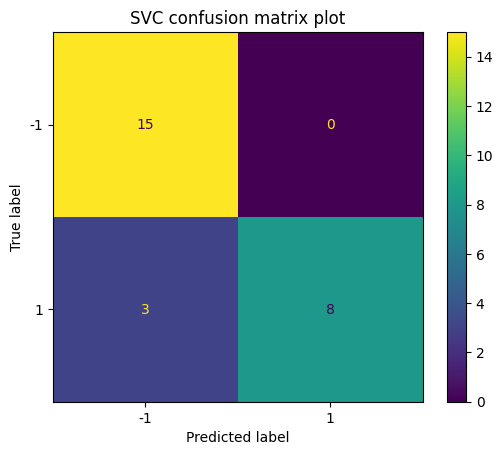

In [39]:
# Results from SVC
svc_cm_plot = ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test)
svc_cm_plot.ax_.set_title("SVC confusion matrix plot")


Text(0.5, 1.0, 'QSVC confusion matrix plot')

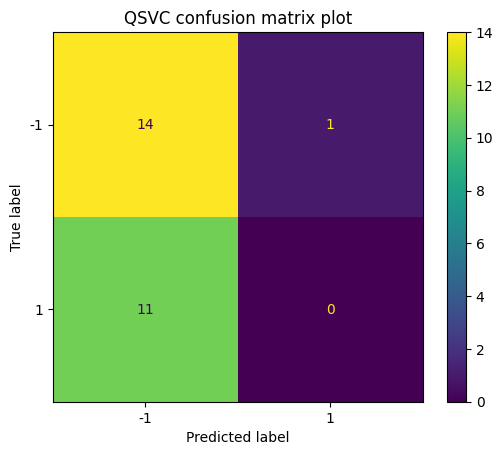

In [40]:
# Results from QSVC
qsvc_cm_plot = ConfusionMatrixDisplay.from_estimator(qsvc_model, X_test, y_test)
qsvc_cm_plot.ax_.set_title("QSVC confusion matrix plot")
